In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
%load_ext autoreload

In [4]:
%autoreload 2

from Network import *

In [4]:
cost = train(save_path = 'params')

Extracting train-images-idx3-ubyte.gz
Extracting train-labels-idx1-ubyte.gz


  0%|                                                                                         | 0/1563 [00:00<?, ?it/s]

LR:0.01, Batch Size:32


Cost: 0.00: 100%|████████████████████████████████████████████████████████████████| 1563/1563 [2:38:23<00:00,  6.08s/it]


In [32]:
params = pickle.load(open('params', 'rb'))
[f1, f2, w3, w4, b1, b2, b3, b4] = params

X = extract_data('t10k-images-idx3-ubyte.gz', 10000, 28)
y_dash = extract_labels('t10k-labels-idx1-ubyte.gz', 10000).reshape(10000,1)
X-= int(np.mean(X)) 
X/= int(np.std(X)) 
test_data = np.hstack((X,y_dash))

X = test_data[:,0:-1]
X = X.reshape(len(test_data), 1, 28, 28)
y = test_data[:,-1]

c = 0
digit_count = [0 for i in range(10)]
digit_correct = [0 for i in range(10)]

t = tqdm(range(len(X)), leave=True)

predictions = np.zeros(len(X))
for i in t:
    x = X[i]
    pred, prob = predict(x, f1, f2, w3, w4, b1, b2, b3, b4)
    digit_count[int(y[i])]+=1
    predictions[i] = pred
    if pred==y[i]:
        c+=1
        digit_correct[pred]+=1

    t.set_description("Acc:%0.2f%%" % (float(c/(i+1))*100))
        
print("Overall Accuracy: %.2f" % (float(c/len(test_data)*100)))

  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]

Extracting t10k-images-idx3-ubyte.gz
Extracting t10k-labels-idx1-ubyte.gz


Acc:98.42%: 100%|████████████████████████████████████████████████████████████████| 10000/10000 [14:28<00:00, 11.51it/s]

Overall Accuracy: 98.42


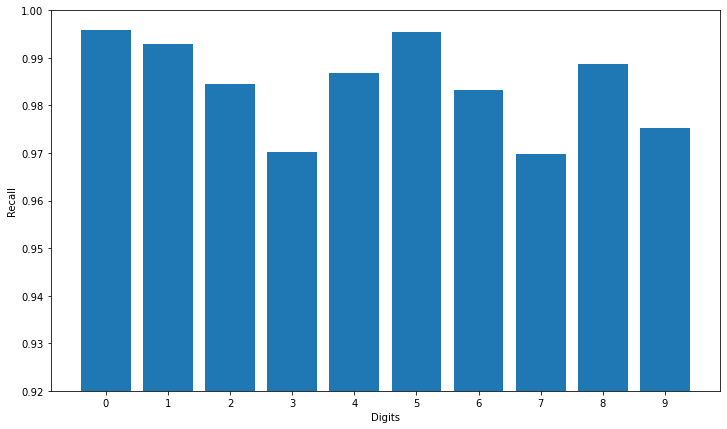

In [19]:
x = np.arange(10)
digit_recall = [x / y for x,y in zip(digit_correct, digit_count)]
plt.figure(figsize = (12,7))
plt.xlabel('Digits')
plt.ylabel('Recall')
plt.ylim(0.92, 1)
plt.xticks(x)
plt.bar(x,digit_recall)
plt.show()

<Figure size 1080x576 with 0 Axes>

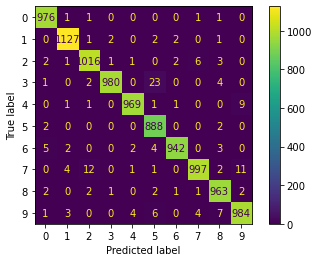

In [34]:
cm = confusion_matrix(y, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()